# Intro to scikit-learn (sklearn)

scikit-learn library:
0. end-to-end scikit-learn workflow
1. getting the data ready
2. choose the right estimator/algorithm
3. fit the model/algorithm and use it to make predictions
4. evaluate the model
5. improve the model
6. save and load a trained model
7. putting it all together

In [1]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
sklearn.show_versions()


System:
    python: 3.8.3 (default, Jul  2 2020, 11:26:31)  [Clang 10.0.0 ]
executable: /opt/anaconda3/bin/python
   machine: macOS-10.16-x86_64-i386-64bit

Python dependencies:
       pip: 20.3.3
setuptools: 52.0.0.post20210125
   sklearn: 0.22.1
     numpy: 1.19.2
     scipy: 1.4.1
    Cython: None
    pandas: 1.2.1
matplotlib: 3.3.2
    joblib: 1.0.1

Built with OpenMP: True


## 0. An end-to-end scikit-learn workflow

In [2]:
# 1. data
import pandas as pd
heart_disease=pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# feature matrix
X=heart_disease.drop('target',axis=1)
# y(labels)
y=heart_disease['target']

In [4]:
# 2. choose the right model and hyperparameters
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()    # clf:classifier
# default parameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [5]:
# 3. fit the model to the training data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)     # 20% of the data used for testing

In [6]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
# make a prediction
y_label=clf.predict(np.array([0,2,3,4]))

ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [8]:
y_preds=clf.predict(X_test)
y_preds

array([1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1])

In [9]:
y_test

272    0
299    0
116    1
236    0
301    0
      ..
101    1
73     1
250    0
106    1
40     1
Name: target, Length: 61, dtype: int64

In [10]:
# 4. evaluate the model on the training data and test data
clf.score(X_train,y_train)

1.0

In [11]:
clf.score(X_test,y_test)

0.8032786885245902

In [12]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        34
           1       0.80      0.74      0.77        27

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [13]:
confusion_matrix(y_test,y_preds)

array([[29,  5],
       [ 7, 20]])

In [14]:
accuracy_score(y_test,y_preds)

0.8032786885245902

In [15]:
# 5. improve a model
# try different amount of n_estimators
np.random.seed(42)
for i in range(10,100,10):
    print(f"trying model with {i} estimators...")
    clf=RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    print(f"model accuracy on test set:{clf.score(X_test,y_test)*100:.2f}%")
    print(' ')

trying model with 10 estimators...
model accuracy on test set:73.77%
 
trying model with 20 estimators...
model accuracy on test set:78.69%
 
trying model with 30 estimators...
model accuracy on test set:80.33%
 
trying model with 40 estimators...
model accuracy on test set:77.05%
 
trying model with 50 estimators...
model accuracy on test set:77.05%
 
trying model with 60 estimators...
model accuracy on test set:75.41%
 
trying model with 70 estimators...
model accuracy on test set:75.41%
 
trying model with 80 estimators...
model accuracy on test set:73.77%
 
trying model with 90 estimators...
model accuracy on test set:80.33%
 


In [16]:
# 6. save a model and load it
import pickle
pickle.dump(clf,open('random_forest_model_1.pkl','wb'))

In [17]:
loaded_model=pickle.load(open('random_forest_model_1.pkl','rb'))
loaded_model.score(X_test,y_test)

0.8032786885245902

## 1. getting the data ready

1. split the data into features and labels (`X` & `y`)
2. filling (imputing) or disregarding missing values
3. converting non-numerical values to numerical values (aka feature encoding)

In [18]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [19]:
X=heart_disease.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [20]:
y=heart_disease['target']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [21]:
# split the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)

In [22]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

### 1.1 Make sure numerical

In [23]:
car_sales=pd.read_csv('car-sales-extended.csv')
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [24]:
len(car_sales)

1000

In [25]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [26]:
# split the data
X=car_sales.drop('Price',axis=1)
y=car_sales['Price']
# split into training and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                              y,
                                              test_size=0.2)

In [27]:
# build machine learning model
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
model.score(X_test,y_test)

ValueError: could not convert string to float: 'Toyota'

In [28]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [29]:
# turn categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_feature =['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_feature)],
                                 remainder='passthrough')
transformed_X=transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [31]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [32]:
dummies=pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [33]:
# refit the model
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(transformed_X,y,test_size=0.2)
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [34]:
model.score(X_test,y_test)

0.3235867221569877

### 1.2 missing values

1. imputation
2. remove missing data

In [35]:
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [36]:
car_sales_missing.isna()

,Make,Colour,Odometer (KM),Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,True,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [37]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [38]:
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [39]:
X=car_sales_missing.drop("Price",axis=1)
y=car_sales_missing['Price']

#### Option 1: fill missing data with pandas

In [40]:
car_sales_missing['Doors'].value_counts()

4.0    811
5.0     75
3.0     64
Name: Doors, dtype: int64

In [41]:
car_sales_missing['Make'].fillna('missing',inplace=True)
car_sales_missing['Colour'].fillna('missing',inplace=True)
car_sales_missing['Odometer (KM)'].fillna(car_sales_missing['Odometer (KM)'].mean(),inplace=True)
car_sales_missing['Doors'].fillna(4,inplace=True)

In [42]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [43]:
# remove rows with missing Price value
car_sales_missing.dropna(inplace=True)
car_sales
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [44]:
len(car_sales_missing)

950

In [45]:
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                                 remainder='passthrough')
transformed_X=transformer.fit_transform(car_sales_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

In [47]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,35431.0,15323.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0,19943.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,84714.0,28343.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,154365.0,13434.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0,14043.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
945,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0,32042.0
946,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,155144.0,5716.0
947,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0,31570.0
948,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,215883.0,4001.0


### Option 2: fill missing values with scikit-learn

In [48]:
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [49]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [50]:
car_sales_missing.dropna(subset=['Price'],inplace=True)    # drop rows with no Price
car_sales_missing.isna().sum()
# len(car_sales_missing['Price'])
len(car_sales_missing['Price'])

950

In [51]:
# split into X, y
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']
# split data into train and test
from sklearn.model_selection import train_test_split
# import numpy as np
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)


In [52]:
# filling missing data with scikit-learn
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# fill categorical values with 'missing' and numerical values with mean
cat_imputer=SimpleImputer(strategy='constant',fill_value='missing')
door_imputer=SimpleImputer(strategy='constant',fill_value=4)
num_imputer=SimpleImputer(strategy='mean')

# define columns
car_features=['Make','Colour']
door_features=['Doors']
num_features=['Odometer (KM)']

In [53]:
# create an imputer
imputer=ColumnTransformer([
    ('cat_imputer',cat_imputer,car_features),
    ('door_imputer',door_imputer,door_features),
    ('num_imputer',num_imputer,num_features)
])

# fill train and test values separately
filled_X_train=imputer.fit_transform(X_train)
filled_X_test=imputer.transform(X_test)
filled_X_train

array([['Honda', 'White', 4.0, 71934.0],
       ['Toyota', 'Red', 4.0, 162665.0],
       ['Honda', 'White', 4.0, 42844.0],
       ...,
       ['Toyota', 'White', 4.0, 196225.0],
       ['Honda', 'Blue', 4.0, 133117.0],
       ['Honda', 'missing', 4.0, 150582.0]], dtype=object)

In [54]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [55]:
car_sales_filled_train=pd.DataFrame(filled_X_train,
                                    columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled_test=pd.DataFrame(filled_X_test,
                                    columns=['Make','Colour','Doors','Odometer (KM)'])
car_sales_filled_train.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [56]:
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [57]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
categorical_features=['Make','Colour','Doors']
one_hot=OneHotEncoder()
transformer=ColumnTransformer([('one_hot',
                                 one_hot,
                                 categorical_features)],
                                 remainder='passthrough')
transformed_X_train=transformer.fit_transform(car_sales_filled_train)
tranformed_X_test=transformer.transform(car_sales_filled_test)
transformed_X_train.toarray()

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 7.19340e+04],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.62665e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 4.28440e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.96225e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.33117e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 1.50582e+05]])

In [58]:
# fit the model
np.random.seed(42)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
model=RandomForestRegressor()
model.fit(transformed_X_train,y_train)
model.score(tranformed_X_test,y_test)

0.21229043336119102

## 2. Choose the right estimator/algorithm

## 2.1 picking a ml model for a regression problem

In [59]:
# Boston housing dataset
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [60]:
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [61]:
# how many samples
len(boston_df)

506

#### Ridge regression

In [62]:
# ridge regression
from sklearn.linear_model import Ridge
np.random.seed(42)
X=boston_df.drop('target',axis=1)
y=boston_df['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
model=Ridge()      # alpha
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.6662221670168518

how to improve R^2 

what if Ridge doesn't work

#### Random forest regressor

In [63]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=boston_df.drop('target',axis=1)
y=boston_df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.873969014117403

### 2.2 choose an estimator for a classification problem

In [64]:
heart_disease=pd.read_csv('heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [65]:
len(heart_disease)

303

#### Linear SVC

In [66]:
from sklearn.svm import LinearSVC
np.random.seed(42)
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
clf=LinearSVC(max_iter=1000)
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.47540983606557374

In [67]:
heart_disease['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

#### Random forest classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8524590163934426

1. if you have structured data, use ensemble methods
2. if you have unstructured data (image,audio etc) , use deep learning or transfer learning

## 3. fit the model/algorithm on data and use it to make predictions
### 3.1 fitting the model

* `X` = features, feature variables, data
* `y` = labels, targets, target variables

In [69]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
clf.score(X_test,y_test)

0.8524590163934426

In [70]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [71]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

### 3.2 make predictions using a ml model

2 ways to make predictions:

1.`predict()`

2.`predict_proba()`

In [72]:
# use a trained model to make predictions
clf.predict(np.array([1,7,8,3,4]))            # doesn't work

ValueError: Expected 2D array, got 1D array instead:
array=[1. 7. 8. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [73]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [74]:
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [75]:
np.array(y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [76]:
# compare predictions to truth labels to evaluate the model
y_preds=clf.predict(X_test)
np.mean(y_preds==y_test)

0.8524590163934426

In [77]:
clf.score(X_test,y_test)

0.8524590163934426

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_preds)

0.8524590163934426

Make predictions with `predict_proba()`

In [79]:
# predict_proba() returns probabilities of a classification label
clf.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [80]:
clf.predict(X_test[:5])

array([0, 1, 1, 0, 1])

`predict()` can also be used for regression models

In [81]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=boston_df.drop('target',axis=1)
y=boston_df['target']
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)

In [82]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [83]:
np.array(y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [84]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,y_preds)

2.1226372549019623

## 4. evaluating ml model

three ways to estimate scikit-learn models/estimators:
1. estimator `score` method
2. `scoring` parameter
3. problem-specific metric functions

### 4.1 evaluating a model with the `score` method

In [85]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease=pd.read_csv('heart-disease.csv')
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [86]:
clf.score(X_train,y_train)

1.0

In [87]:
clf.score(X_test,y_test)

0.8524590163934426

do the same for the regression model

In [88]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
from sklearn.datasets import load_boston
boston=load_boston()
boston_df=pd.DataFrame(boston['data'],columns=boston['feature_names'])
boston_df['target']=pd.Series(boston['target'])
X=boston_df.drop('target',axis=1)
y=boston_df['target']
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [89]:
model.score(X_test,y_test)

0.873969014117403

### 4.2 evaluating a model with the `scoring` parameter

In [90]:
from sklearn.model_selection import cross_val_score


from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease=pd.read_csv('heart-disease.csv')
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train);

In [91]:
clf.score(X_test,y_test)

0.8524590163934426

In [92]:
cross_val_score(clf,X,y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [93]:
cross_val_score(clf,X,y,cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [94]:
np.random.seed(42)

# single training and test split score
clf_single_score=clf.score(X_test,y_test)

# take the mean of 5-fold cross-validation score
clf_cross_val_score=np.mean(cross_val_score(clf,X,y,cv=5))

# compare the two
clf_single_score,clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [95]:
# default scoring parameter of classifier=mean accuracy
clf.score()

TypeError: score() missing 2 required positional arguments: 'X' and 'y'

In [ ]:
# scoring parameter set to None by default
np.random.seed(42)
cross_val_score(clf,X,y,cv=5,scoring=None)

### 4.2.1 classification model evaluation metrics

1. accuracy
2. area under ROC curve
3. confusion matrix
4. classification report

**Accuracy**

In [ ]:
heart_disease.head()

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']
clf=RandomForestClassifier()
cross_val_score=cross_val_score(clf,X,y,cv=5)

In [ ]:
np.mean(cross_val_score)

In [ ]:
print(f'heart disease classifier cross-validated accuracy: {np.mean(cross_val_score)*100:.2f}%')

In [ ]:
from sklearn.model_selection import cross_val_predict
y_preds=cross_val_predict(clf,X,y,cv=5)
y_preds[:20]

**Area under the receiver operating characteristic curve (AUC/ROC)**

* area under curve(AUC)
* ROC curve

ROC curves are a comparision of a model's true postive rate (tpr) versus a model's false positive rate (fpr).

* true postive=model predicts 1 when truth is 1
* false positive=model predicts 1 when truth is 0
* true negative=model predicts 0 when truth is 0
* false negative=model predicts 0 when truth is 1

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [97]:
from sklearn.metrics import roc_curve
clf.fit(X_train,y_train)
# make predictions with probabilities
y_probs=clf.predict_proba(X_test)
y_probs[:10],len(y_probs)

(array([[0.51, 0.49],
        [0.17, 0.83],
        [0.51, 0.49],
        [0.72, 0.28],
        [0.43, 0.57],
        [0.12, 0.88],
        [0.3 , 0.7 ],
        [0.97, 0.03],
        [0.15, 0.85],
        [0.4 , 0.6 ]]),
 61)

In [98]:
y_probs_positive=y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [99]:
# calculate fpr,tpr,thresholds
fpr,tpr,thresholds=roc_curve(y_test,y_probs_positive)
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

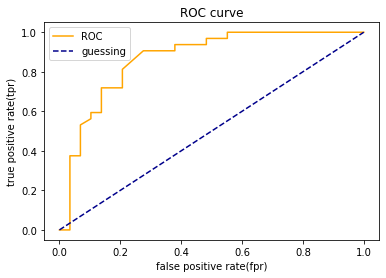

In [100]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt
def plot_roc_curve(fpr,tpr):
    '''
    plot a ROC curve give the false postive rate(fpr) and true positive rate(tpr)
    of a model
    '''
    # plot ROC curve
    plt.plot(fpr,tpr,c='orange',label='ROC')
    # plot line with no predictive power(baseline)
    plt.plot([0,1],[0,1],c='darkblue',linestyle='--',label='guessing')
    
    # customize the plot
    plt.xlabel('false positive rate(fpr)')
    plt.ylabel('true positive rate(tpr)')
    plt.title('ROC curve')
    plt.legend()
    #plt.show()
plot_roc_curve(fpr,tpr)

In [101]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_probs_positive)

0.8669181034482759

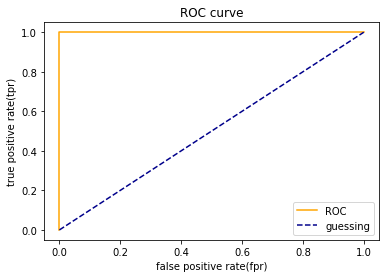

In [102]:
# plot perfect ROC curve and AUC score
fpr,tpr,thresholds=roc_curve(y_test,y_test)
plot_roc_curve(fpr,tpr)

In [103]:
# perfect AUC score
roc_auc_score(y_test,y_test)

1.0

**confusion matrix**

a confusion matrix is a quick way to compare the labels amodel predicts and the actual labels it was supposed to predict.

in essence, giving an idea of where the model is getting confused.

In [104]:
from sklearn.metrics import confusion_matrix
y_preds=clf.predict(X_test)
confusion_matrix(y_test,y_preds)

array([[23,  6],
       [ 6, 26]])

In [105]:
# visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test,
            y_preds,
           rownames=['actual label'],
           colnames=['predicted label'])

predicted label,0,1
actual label,,
0,23,6
1,6,26


In [106]:
24+2+9+26,len(X_test)

(61, 61)

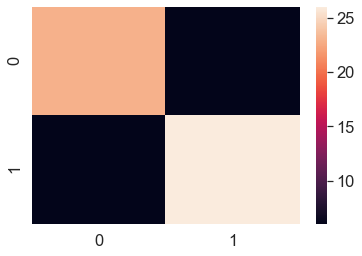

In [107]:
# make our confusion matrix more visual with Seaborn's heatmap()
import seaborn as sns
sns.set(font_scale=1.5)
conf_mat=confusion_matrix(y_test,y_preds)
sns.heatmap(conf_mat);

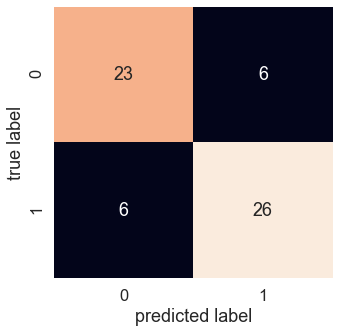

In [108]:
def plot_conf_mat(conf_mat):
    '''
    plot a confusion matrix using seaborn's heatmatp()
    '''
    fig,ax=plt.subplots(figsize=(5,5))
    ax=sns.heatmap(conf_mat,
                   annot=True,
                   cbar=False)
    plt.xlabel('predicted label')
    plt.ylabel('true label')
plot_conf_mat(conf_mat)

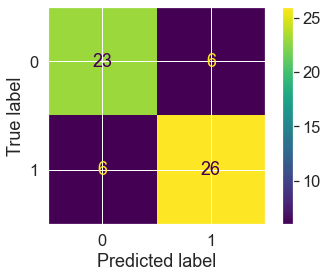

In [109]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(clf,X_test,y_test);

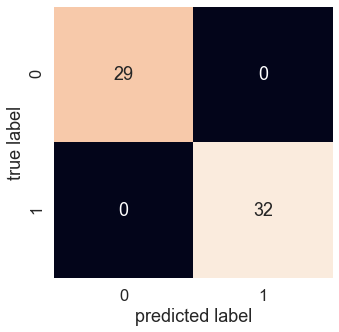

In [110]:
# create perfect confusion matrix
conf_max=confusion_matrix(y_test,y_test)
plot_conf_mat(conf_max)

**classification report**

In [111]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



In [112]:
# where precision and recall become valueable
disease_true=np.zeros(10000)
disease_true[0]=1 # only one positive case
disease_preds=np.zeros(10000) # model predicts every case as 0
pd.DataFrame(classification_report(disease_true,disease_preds,output_dict=True))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### 4.2.2 Regression model evaluation metrics

1. R^2: coefficient of determination
2. MAE: Mean absolute error
3. MSE: Mean squared error

**R^2**

In [113]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(42)
X=boston_df.drop('target',axis=1)
y=boston_df['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train);

In [114]:
model.score(X_test,y_test)

0.873969014117403

In [115]:
from sklearn.metrics import r2_score
y_test_mean=np.full(len(y_test),y_test.mean())
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [116]:
r2_score(y_test,y_test_mean)

0.0

In [117]:
r2_score(y_test,y_test)

1.0

**MAE**

In [118]:
from sklearn.metrics import mean_absolute_error
y_preds=model.predict(X_test)
mae=mean_absolute_error(y_test,y_preds)
mae

2.1226372549019623

In [119]:
df=pd.DataFrame(data={'actual values':y_test,
                      'predicted values':y_preds})
df['differences']=abs(df['predicted values']-df['actual values'])
df

,actual values,predicted values,differences
173,23.6,23.002,0.598
274,32.4,30.826,1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,4.870
436,9.6,12.490,2.890
411,17.2,13.406,3.794
86,22.5,20.219,2.281


In [120]:
df['differences'].mean()

2.1226372549019623

In [121]:
mean_absolute_error(y_test,y_preds)

2.1226372549019623

**MSE**

In [122]:
from sklearn.metrics import mean_squared_error
y_preds=model.predict(X_test)
mse=mean_squared_error(y_test,y_preds)
mse

9.242328990196082

In [123]:
df['difference squared']=df['differences']**2
df

,actual values,predicted values,differences,difference squared
173,23.6,23.002,0.598,0.357604
274,32.4,30.826,1.574,2.477476
491,13.6,16.734,3.134,9.821956
72,22.8,23.467,0.667,0.444889
452,16.1,16.853,0.753,0.567009
...,...,...,...,...
412,17.9,13.030,4.870,23.716900
436,9.6,12.490,2.890,8.352100
411,17.2,13.406,3.794,14.394436
86,22.5,20.219,2.281,5.202961


In [124]:
df.drop('difference squared',axis=1,inplace=True)

In [125]:
df

,actual values,predicted values,differences
173,23.6,23.002,0.598
274,32.4,30.826,1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,4.870
436,9.6,12.490,2.890
411,17.2,13.406,3.794
86,22.5,20.219,2.281


In [126]:
squared=np.square(df['differences'])
np.mean(squared)

9.242328990196082

In [127]:
mean_squared_error(y_test,y_preds)

9.242328990196082

### 4.2.3 `scoring` parameter

In [128]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']
clf=RandomForestClassifier()

In [129]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [130]:
print(f"the cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

the cross-validated accuracy is : 82.48%


In [131]:
np.random.seed(42)
cv_acc=cross_val_score(clf,X,y,cv=5,scoring='accuracy')
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [132]:
print(f"the cross-validated accuracy is : {np.mean(cv_acc)*100:.2f}%")

the cross-validated accuracy is : 82.48%


In [133]:
# precision
np.random.seed(42)
cv_precision=cross_val_score(clf,X,y,cv=5,scoring='precision')
np.mean(cv_precision)

0.8329547346025924

In [134]:
# recall
np.random.seed(42)
cv_recall=cross_val_score(clf,X,y,cv=5,scoring='recall')
np.mean(cv_recall)

0.8545454545454545

In [135]:
# F1
np.random.seed(42)
cv_f1=cross_val_score(clf,X,y,cv=5,scoring='f1')
np.mean(cv_f1)

0.8426854603423346

regression model

In [136]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)
X=boston_df.drop('target',axis=1)
y=boston_df['target']

model=RandomForestRegressor()

In [137]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring=None)
cv_r2
np.mean(cv_r2)

0.622375083951403

In [138]:
np.random.seed(42)
cv_r2=cross_val_score(model,X,y,cv=5,scoring='r2')
cv_r2
np.mean(cv_r2)

0.622375083951403

In [139]:
# MAE
cv_mae=cross_val_score(model,X,y,cv=5,scoring='neg_mean_absolute_error')
cv_mae

array([-2.12751961, -2.53956436, -3.42026733, -3.82432673, -3.06893069])

In [140]:
# MSE
cv_mse=cross_val_score(model,X,y,cv=5,scoring='neg_mean_squared_error')
np.mean(cv_mse)

-21.02253826604542

### 4.3 using different evaluation metrics as scikit-learn functions

**classification**

In [141]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
np.random.seed(42)
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)


y_preds=clf.predict(X_test)

print('classifier metrics on the test set')
print(f"accuracy: {accuracy_score(y_test,y_preds)*100:.2f}%")
print(f"precesion: {precision_score(y_test,y_preds)*100:.2f}%")
print(f"recall: {recall_score(y_test,y_preds)*100:.2f}%")
print(f"F1: {f1_score(y_test,y_preds)*100:.2f}%")

classifier metrics on the test set
accuracy: 85.25%
precesion: 84.85%
recall: 87.50%
F1: 86.15%


**regression**

In [142]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
np.random.seed(42)
X=boston_df.drop('target',axis=1)
y=boston_df['target']
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2)
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_preds=model.predict(X_test)
print('regression model metrics on the test set')
print(f"R^2: {r2_score(y_test,y_preds)}")
print(f"MAE: {mean_absolute_error(y_test,y_preds)}")
print(f"MSE: {mean_squared_error(y_test,y_preds)}")

regression model metrics on the test set
R^2: 0.8739690141174031
MAE: 2.1226372549019623
MSE: 9.242328990196082


## 5. improving a model

    first prediction: baseline prediction.
    first model: baseline model.
    
    from a data perspective:
        * more data
        * improve the data
        
    from a model perspective:
        * a better model?
        * improve the current model
    
    parameters: model find these patterns in data
    hyperparameters: setting on a model you can adjutst to (potentially) improve its ability to find patterns
    
    
three ways to adjust hyperparameters:
1. by hand
2. randomly with `RandomSearchCV`
3. exhaustively with `GridSearchCV`


    

In [143]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

In [144]:
clf.get_params()      # hyperparameters

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 tuning hyperparameters my hand

make 3 sets, training, validation and test.

In [145]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

try and adjust:

* `max_depth`
* `max_features`
* `min_samples_leaf`
* `min_samples_split`
* `n_estimators`

In [146]:
def evaluate_preds(y_true,y_preds):
    '''
    perform evaluation comparison on y_true labels vs y_preds labels on a classification.
    '''
    accuracy=accuracy_score(y_true,y_preds)
    precision=precision_score(y_true,y_preds)
    recall=recall_score(y_true,y_preds)
    f1=f1_score(y_true,y_preds)
    metric_dict={'accuracy':round(accuracy,2),
                 'precision':round(precision,2),
                 'recall':round(recall,2),
                 'f1':round(f1,2)
                }
    print(f"acc: {accuracy*100:.2f}%")
    print(f"precision: {precision:.2f}")
    print(f"recall: {recall:.2f}")
    print(f"F1 score: {f1:.2f}")
    
    return metric_dict

In [147]:
from sklearn.ensemble import RandomForestClassifier
np.random.seed(42)
heart_disease_shuffled=heart_disease.sample(frac=1)
heart_disease_shuffled.head()
X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']

# split the data into train, validation, test sets
train_split=round(0.7*len(heart_disease_shuffled))     # 70% of the data
valid_split=round(train_split+0.15*len(heart_disease_shuffled))
X_train,y_train=X[:train_split],y[:train_split]
X_valid,y_valid=X[train_split:valid_split],y[train_split:valid_split]
X_test,y_test=X[valid_split:],y[valid_split:]
#len(X_train),len(X_valid),len(X_test)
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
# baseline predictions
y_preds=clf.predict(X_valid)
baseline_metrics=evaluate_preds(y_valid,y_preds)

acc: 82.22%
precision: 0.81
recall: 0.88
F1 score: 0.85


In [148]:
np.random.seed(42)
# create a second classifier with different parameters
clf_2=RandomForestClassifier(n_estimators=250)
clf_2.fit(X_train,y_train)
y_preds_2=clf_2.predict(X_valid)
clf_2_metrics=evaluate_preds(y_valid,y_preds_2)

acc: 84.44%
precision: 0.85
recall: 0.88
F1 score: 0.86


### 5.2 hyperparameter tuning with RandomizedSearchCV

In [149]:
from sklearn.model_selection import RandomizedSearchCV

grid={'n_estimators':[10,100,200,500,1000,1200],
      'max_depth':[None,5,10,20,30],
      'max_features':['auto','sqrt'],
      'min_samples_split':[2,4,6],
      'min_samples_leaf':[1,2,4]}
np.random.seed(42)
X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10, # number of models to try, improve n_iter will probably get better results
                          cv=5,
                          verbose=2)
rs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.1s
[CV] n_estimators=100, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   0.2s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=4, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   18.2s finished


In [150]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [151]:
# make predictions with the best hyperparameters
rs_y_preds=rs_clf.predict(X_test)
rs_metrics=evaluate_preds(y_test,rs_y_preds)

acc: 81.97%
precision: 0.77
recall: 0.86
F1 score: 0.81


### 5.3 hyperparameter with GridSearchCV

In [152]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [153]:
6*5*2*3*3*5  # combination*cv(5)

2700

In [154]:
grid_2={'n_estimators': [100, 200, 500],            # based on rs_clf.best_params_
 'max_depth': [None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [6],
 'min_samples_leaf': [1, 2]} 

In [155]:
3*1*2*1*2*5

60

In [156]:
from sklearn.model_selection import GridSearchCV,train_test_split
np.random.seed(42)
X=heart_disease_shuffled.drop('target',axis=1)
y=heart_disease_shuffled['target']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
clf=RandomForestClassifier(n_jobs=1)
gs_clf=GridSearchCV(estimator=clf,
                          param_grid=grid_2,
                          cv=5,
                          verbose=2)
gs_clf.fit(X_train,y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   16.4s finished


In [157]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [158]:
gs_y_preds=gs_clf.predict(X_test)
gs_metrics=evaluate_preds(y_test,gs_y_preds)

acc: 78.69%
precision: 0.74
recall: 0.82
F1 score: 0.78


compare different models metrics: models should be trained on the same data (X_train,y_train),
and the predictions should also be made on the same data

In [159]:
X=heart_disease.drop('target',axis=1)
y=heart_disease['target']
np.random.seed(42)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [160]:
# baseline model
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_preds=clf.predict(X_test)
baseline_metrics=evaluate_preds(y_test,y_preds)

acc: 83.61%
precision: 0.84
recall: 0.84
F1 score: 0.84


In [161]:
# RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
grid
clf=RandomForestClassifier(n_jobs=1)
rs_clf=RandomizedSearchCV(estimator=clf,
                          param_distributions=grid,
                          n_iter=10,
                          cv=5,
                          random_state=42,
                          refit=True               # refit=True to refit the best model on the full dataset
                      )
rs_clf.fit(X_train,y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [162]:
rs_clf.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 30}

In [164]:
rs_y_preds=rs_clf.predict(X_test)
rs_metrics=evaluate_preds(y_test,rs_y_preds)

acc: 85.25%
precision: 0.85
recall: 0.88
F1 score: 0.86


In [165]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [166]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
grid_2={'n_estimators': [50,100, 150],
 'max_depth': [None,30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2],
 'min_samples_leaf': [1, 2, 4]}
clf=RandomForestClassifier(n_jobs=1)
gs_clf=GridSearchCV(estimator=clf,
                    param_grid=grid_2,
                    cv=5,
                    verbose=2,
                    refit=True)
gs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=aut

[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=None, max_features=sqrt

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=150, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=auto, min_samples_le

[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=50, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100 
[CV]  max_depth=30, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] max_depth=30, max_features=sqrt, min_samples_leaf=

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:   19.6s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
                                              random_s

In [167]:
gs_clf.get_params

<bound method BaseEstimator.get_params of GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=1,
                                              oob_score=False,
            

In [168]:
gs_y_preds=gs_clf.predict(X_test)
gs_metrics=evaluate_preds(y_test,gs_y_preds)

acc: 86.89%
precision: 0.85
recall: 0.91
F1 score: 0.88


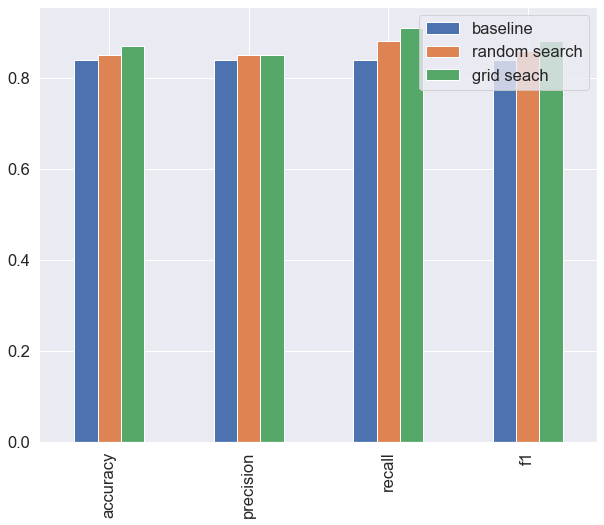

In [169]:
compare_metrics=pd.DataFrame({'baseline':baseline_metrics,
                              'random search':rs_metrics,
                              'grid seach':gs_metrics})
compare_metrics.plot.bar(figsize=(10,8));

## 6. saving and loading trained ml models

two ways:
1. with python's `pickle` module
2. with the `joblib` module


**Pickle**

In [171]:
import pickle

# save an existing model to file
pickle.dump(gs_clf,open('gs_random_forest_model_1.pkl','wb'))

In [172]:
# load a saved model
loaded_pickle_model=pickle.load(open('gs_random_forest_model_1.pkl','rb'))

In [173]:
# make some predictions
pickle_y_preds=loaded_pickle_model.predict(X_test)
evaluate_preds(y_test,pickle_y_preds)

acc: 86.89%
precision: 0.85
recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

In [174]:
gs_clf.predict(X_test)
gs_metrics=evaluate_preds(y_test,gs_y_preds)

acc: 86.89%
precision: 0.85
recall: 0.91
F1 score: 0.88


**Joblib**

In [176]:
from joblib import dump,load
dump(gs_clf,filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [177]:
loaded_joblib_model=load(filename='gs_random_forest_model_1.joblib')

In [178]:
joblib_y_preds=loaded_joblib_model.predict(X_test)
evaluate_preds(y_test,joblib_y_preds)

acc: 86.89%
precision: 0.85
recall: 0.91
F1 score: 0.88


{'accuracy': 0.87, 'precision': 0.85, 'recall': 0.91, 'f1': 0.88}

## 7. putting it all together

In [182]:
data=pd.read_csv('car-sales-extended-missing-data.csv')
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [183]:
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [184]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

steps:
1. fill missing data
2. convert data to numbers
3. build a model on the data

In [212]:
# getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# set up random seed
import numpy as np
np.random.seed(42)

# import data and drop rows with missing labels
data=pd.read_csv('car-sales-extended-missing-data.csv')
data.dropna(subset=['Price'],axis=0,inplace=True)

# define different features and transformer pipeline
categorical_features=['Make','Colour']
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))])
door_feature=['Doors']
door_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=4))
])
numeric_features=['Odometer (KM)']
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))
])

# setup preprocessing (fill missing values, then convert to numbers)
preprocessor=ColumnTransformer(
     transformers=[
    ('cat',categorical_transformer,categorical_features),
    ('door',door_transformer,door_feature),
    ('num',numeric_transformer,num_features)
])

# creating a preprocessing and modelling pipeling
model=Pipeline(steps=[('preprocessor',preprocessor),
                      ('model',RandomForestRegressor())])

# split data
X=data.drop('Price',axis=1)
y=data['Price']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

# fit and score the model
model.fit(X_train,y_train)
model.score(X_test,y_test)


0.22188417408787875

**`pipeline()` step by step**

In [199]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
car_sales_missing=pd.read_csv('car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [201]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [203]:
car_sales_missing.dropna(subset=['Price'],inplace=True)
car_sales_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [204]:
X=car_sales_missing.drop('Price',axis=1)
y=car_sales_missing['Price']

`Pipeline()` is a class which allows us to put multiple steps, such as filling data and then modelling it, together sequentially.

the following steps:
1. define categorical, door and numeric featues
2. build transformer `Pipeline()`'s for imputing missing data and encoding data
3. combine transformer `Pipeline()`'s with `ColumnTransformer()`
4. build a `Pipeline()` to preprocess and model our data with the `ColumnTransformer()` and `RandomForestRegressor()`
5. split the data into train and test set with `train_test_split()`
6. fit the preprocessing and modelling `Pipeline()` on the training data
7. score the preprocessing and modelling `Pipeline()`on the test data

In [206]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer       # fill missing values
from sklearn.preprocessing import OneHotEncoder # turn categorical variables into numbers

categorical_features=['Make','Colour']
categorical_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot',OneHotEncoder(handle_unknown='ignore'))
])

door_feature=['Doors']
door_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value=4))
])

numeric_features=['Odometer (KM)']
numeric_transformer=Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean'))
])

In [207]:
from sklearn.compose import ColumnTransformer
preprocessor=ColumnTransformer(
      transformers=[
          # (name,transformer_to_use,features_to_use transform)
          ('categorical',categorical_transformer,categorical_features),
          ('door',door_transformer,door_feature),
          ('numerical',numeric_transformer,num_features)
 ])

In [208]:
from sklearn.ensemble import RandomForestRegressor
model=Pipeline(steps=[('preprocessor',preprocessor),
                      ('regressor',RandomForestRegressor())
                     
                     ]
              )

In [210]:
from sklearn.model_selection import train_test_split
np.random.seed(42)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('categorical',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                              

In [211]:
model.score(X_test,y_test)

0.22188417408787875

use `GridSearchCV` or `RandomizedSearchCV` with `Pipeline()`

In [214]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV
pipe_grid={
    'preprocessor__num__imputer__strategy':['mean','median'],
    'model__n_estimators':[100,1000],
    'model__max_depth':[None,5],
    'model__max_features':['auto'],
    'model__min_samples_split':[2,4]}

gs_model=GridSearchCV(model,pipe_grid,cv=5,verbose=2)
gs_model.fit(X_train,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=2, model__n_estimators=100, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_features=auto, 

[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=100, preprocessor__num__imputer__strategy=median, total=   0.2s
[CV] model__max_depth=None, model__max_features=auto, model__min_samples_split=4, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean 
[CV]  model__max_depth=None, model__max_feat

[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=mean, total=   1.1s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.3s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median, total=   1.2s
[CV] model__max_depth=5, model__max_features=auto, model__min_samples_split=2, model__n_estimators=1000, preprocessor__num__imputer__strategy=median 
[CV]  model__max_depth=5, model__max_features=auto, model

[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:  1.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocessor',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('cat',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                    

In [215]:
gs_model.score(X_test,y_test)

0.3339554263158365